- Surprise package documentation : https://surprise.readthedocs.io/en/stable/

# Pipeline

# 1. Load data using load_builtin method

In [1]:
from surprise import Dataset

In [2]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# Split data in train and test sets

In [3]:
from surprise.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=1)

In [4]:
train

In [5]:
train.n_users, train.n_items

(943, 1648)

# 2. Model

In [153]:
# Using KNNBasic model
from surprise.prediction_algorithms.knns import KNNBasic

In [155]:
# Using BaselineOnly model
from surprise.prediction_algorithms.baseline_only import BaselineOnly

In [8]:
import time

## Train a user based model using cosine similarity

In [9]:
sim_options_UserBased_Cosine = {'name': 'cosine',
                                'user_based': True  # compute  similarities between user-base
                               }

In [10]:
UserBased_Cosine_KNNBasic = KNNBasic(sim_options=sim_options_UserBased_Cosine)
start_time_UserBased_Cosine_KNNBasic = time.time()
UserBased_Cosine_KNNBasic.fit(train)
end_time_UserBased_Cosine_KNNBasic = time.time()
time_UserBased_Cosine_KNNBasic = end_time_UserBased_Cosine_KNNBasic - start_time_UserBased_Cosine_KNNBasic
print(f"Training time: {time_UserBased_Cosine_KNNBasic}s")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Training time: 1.2193105220794678s


## Train a user based model using pearson correlation similarity

In [150]:
sim_options_UserBased_PearsonCorrelation = {'name': 'pearson_baseline',
                                            'user_based': True  # compute similarities between user-base
                               }

In [12]:
UserBased_PearsonCorrelation_KNNBasic = KNNBasic(sim_options=sim_options_UserBased_PearsonCorrelation)
start_time_UserBased_PearsonCorrelation_KNNBasic = time.time()
UserBased_PearsonCorrelation_KNNBasic.fit(train)
end_time_UserBased_PearsonCorrelation_KNNBasic = time.time()
time_UserBased_PearsonCorrelation_KNNBasic = end_time_UserBased_PearsonCorrelation_KNNBasic - start_time_UserBased_PearsonCorrelation_KNNBasic
print(f"Training time: {time_UserBased_PearsonCorrelation_KNNBasic}s")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Training time: 1.4340236186981201s


## Train a Item based model using cosine similarity

In [13]:
sim_options_ItemBased_Cosine = {'name': 'cosine',
                                'user_based': False  # compute  similarities between item-base
                               }

In [14]:
ItemBased_Cosine_KNNBasic = KNNBasic(sim_options=sim_options_ItemBased_Cosine)
start_time_ItemBased_Cosine_KNNBasic = time.time()
ItemBased_Cosine_KNNBasic.fit(train)
end_time_ItemBased_Cosine_KNNBasic = time.time()
time_ItemBased_Cosine_KNNBasic = end_time_ItemBased_Cosine_KNNBasic - start_time_ItemBased_Cosine_KNNBasic
print(f"Training time: {time_ItemBased_Cosine_KNNBasic}s")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Training time: 1.6836106777191162s


## Train a Item based model using pearson correlation similarity

In [15]:
sim_options_ItemBased_PearsonCorrelation = {'name': 'pearson_baseline',
                                            'user_based': False  # compute similarities between item-base
                               }

In [16]:
ItemBased_PearsonCorrelation_KNNBasic = KNNBasic(sim_options=sim_options_ItemBased_PearsonCorrelation)
start_time_ItemBased_PearsonCorrelation_KNNBasic = time.time()
ItemBased_PearsonCorrelation_KNNBasic.fit(train)
end_time_ItemBased_PearsonCorrelation_KNNBasic = time.time()
time_ItemBased_PearsonCorrelation_KNNBasic = end_time_ItemBased_PearsonCorrelation_KNNBasic - start_time_ItemBased_PearsonCorrelation_KNNBasic
print(f"Training time: {time_ItemBased_PearsonCorrelation_KNNBasic}s")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Training time: 1.8046846389770508s


## Train a BaselineOnly model

In [151]:
print('BaselineOnly model Using SGD')
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }

BaselineOnly model Using SGD


In [18]:
BaselineOnlyModel = BaselineOnly(bsl_options=bsl_options)
start_time_BaselineOnlyModel = time.time()
BaselineOnlyModel.fit(train)
end_time_BaselineOnlyModel = time.time()
time_BaselineOnlyModel = end_time_BaselineOnlyModel - start_time_BaselineOnlyModel
print(f"Training time: {time_BaselineOnlyModel}s")

Estimating biases using sgd...
Training time: 0.2499983310699463s


# Make predictions with the model

## Predictions for user based model using cosine similarity

In [19]:
UserBased_Cosine_KNNBasic_predictions = UserBased_Cosine_KNNBasic.test(test)
UserBased_Cosine_KNNBasic_predictions

[Prediction(uid='303', iid='507', r_ui=5.0, est=4.100572844222049, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='637', iid='293', r_ui=3.0, est=3.7741957279468603, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='453', iid='354', r_ui=4.0, est=3.4477815515182395, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='332', iid='174', r_ui=5.0, est=4.449483658315043, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='870', iid='48', r_ui=4.0, est=4.300126140882104, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='488', iid='520', r_ui=4.0, est=4.3239544599431525, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='294', iid='471', r_ui=4.0, est=3.700400802070785, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='514', iid='342', r_ui=1.0, est=3.0310560871834165, details={'actual_k': 39, 'was_impossible': False}),
 Prediction(uid='574', iid='1022', r_ui=2.0, 

## Predictions for user based model using pearson correlation similarity

In [20]:
UserBased_PearsonCorrelation_KNNBasic_predictions = UserBased_PearsonCorrelation_KNNBasic.test(test)
UserBased_PearsonCorrelation_KNNBasic_predictions

[Prediction(uid='303', iid='507', r_ui=5.0, est=4.029230281357967, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='637', iid='293', r_ui=3.0, est=3.638247404035258, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='453', iid='354', r_ui=4.0, est=3.216920824269357, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid='332', iid='174', r_ui=5.0, est=4.61579692240204, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='870', iid='48', r_ui=4.0, est=4.261031227909647, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='488', iid='520', r_ui=4.0, est=4.275653531807791, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='294', iid='471', r_ui=4.0, est=3.577609914039823, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='514', iid='342', r_ui=1.0, est=3.1878309678994494, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid='574', iid='1022', r_ui=2.0, est=

## Predictions for Item based model using cosine similarity

In [21]:
ItemBased_Cosine_KNNBasic_predictions = ItemBased_Cosine_KNNBasic.test(test)
ItemBased_Cosine_KNNBasic_predictions

[Prediction(uid='303', iid='507', r_ui=5.0, est=2.5975816628853017, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='637', iid='293', r_ui=3.0, est=2.5062325836809434, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='453', iid='354', r_ui=4.0, est=2.9450324094638454, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='332', iid='174', r_ui=5.0, est=4.502239792244735, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='870', iid='48', r_ui=4.0, est=3.7229419494267293, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='488', iid='520', r_ui=4.0, est=3.5751236561652693, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='294', iid='471', r_ui=4.0, est=3.7007146197948413, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='514', iid='342', r_ui=1.0, est=3.975999645714829, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='574', iid='1022', r_ui=2.0

## Predictions for Item based model using pearson correlation similarity

In [22]:
ItemBased_PearsonCorrelation_KNNBasic_predictions = ItemBased_PearsonCorrelation_KNNBasic.test(test)
ItemBased_PearsonCorrelation_KNNBasic_predictions

[Prediction(uid='303', iid='507', r_ui=5.0, est=4.142677859895925, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='637', iid='293', r_ui=3.0, est=2.3396740437160255, details={'actual_k': 34, 'was_impossible': False}),
 Prediction(uid='453', iid='354', r_ui=4.0, est=3.489860435064709, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='332', iid='174', r_ui=5.0, est=4.803188537839454, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='870', iid='48', r_ui=4.0, est=3.8546559387102297, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='488', iid='520', r_ui=4.0, est=3.7291747138808224, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='294', iid='471', r_ui=4.0, est=3.7616911981488697, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='514', iid='342', r_ui=1.0, est=3.8114018377685595, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='574', iid='1022', r_ui=2.0,

## Predictions for BaselineOnly model

In [23]:
BaselineOnlyModel_predictions = BaselineOnlyModel.test(test)
BaselineOnlyModel_predictions

[Prediction(uid='303', iid='507', r_ui=5.0, est=3.503414752640073, details={'was_impossible': False}),
 Prediction(uid='637', iid='293', r_ui=3.0, est=3.4851773412197367, details={'was_impossible': False}),
 Prediction(uid='453', iid='354', r_ui=4.0, est=3.4960692227225927, details={'was_impossible': False}),
 Prediction(uid='332', iid='174', r_ui=5.0, est=3.821676179806191, details={'was_impossible': False}),
 Prediction(uid='870', iid='48', r_ui=4.0, est=3.564299894976069, details={'was_impossible': False}),
 Prediction(uid='488', iid='520', r_ui=4.0, est=3.5577462522800096, details={'was_impossible': False}),
 Prediction(uid='294', iid='471', r_ui=4.0, est=3.5450241365227106, details={'was_impossible': False}),
 Prediction(uid='514', iid='342', r_ui=1.0, est=3.5607155800413928, details={'was_impossible': False}),
 Prediction(uid='574', iid='1022', r_ui=2.0, est=3.5290528040553597, details={'was_impossible': False}),
 Prediction(uid='390', iid='258', r_ui=5.0, est=3.6261316994674218,

# Evaluate model with RMSE, MAE

In [24]:
from surprise import accuracy

## Evaluate model for user based model using cosine similarity

In [25]:
rmse_UserBased_Cosine_KNNBasic = accuracy.rmse(predictions=UserBased_Cosine_KNNBasic_predictions)
mae_UserBased_Cosine_KNNBasic = accuracy.mae(predictions=UserBased_Cosine_KNNBasic_predictions)

RMSE: 1.0207
MAE:  0.8067


## Evaluate model for user based model using pearson correlation similarity

In [26]:
rmse_UserBased_PearsonCorrelation = accuracy.rmse(predictions=UserBased_PearsonCorrelation_KNNBasic_predictions)
mae_UserBased_PearsonCorrelation = accuracy.mae(predictions=UserBased_PearsonCorrelation_KNNBasic_predictions)

RMSE: 1.0071
MAE:  0.7950


## Evaluate model for Item based model using cosine similarity

In [27]:
rmse_ItemBased_Cosine_KNNBasic = accuracy.rmse(predictions=ItemBased_Cosine_KNNBasic_predictions)
mae_ItemBased_Cosine_KNNBasic = accuracy.mae(predictions=ItemBased_Cosine_KNNBasic_predictions)

RMSE: 1.0311
MAE:  0.8133


## Evaluate model for Item based model using pearson correlation similarity

In [28]:
rmse_ItemBased_PearsonCorrelation_KNNBasic = accuracy.rmse(predictions=ItemBased_PearsonCorrelation_KNNBasic_predictions)
mae_ItemBased_PearsonCorrelation_KNNBasic = accuracy.mae(predictions=ItemBased_PearsonCorrelation_KNNBasic_predictions)

RMSE: 0.9982
MAE:  0.7837


## Evaluate model for BaselineOnly

In [29]:
rmse_BaselineOnlyModel = accuracy.rmse(predictions=BaselineOnlyModel_predictions)
mae_BaselineOnlyModel = accuracy.mae(predictions=BaselineOnlyModel_predictions)

RMSE: 1.0815
MAE:  0.9014


# 3. Model Benchmarking

In [157]:
import matplotlib.pyplot as plt

In [158]:
# All metric appended to the list
benchmark_metrics = ['User-based CF with cosine similarity', 'User-based CF with pearson correlation similarity', 
                     'Item-based CF with cosine similarity', 'Item-based CF with pearson correlation similarity',
                    'BaselineOnly model']

# All model RMSE values appended to the list
RMSE_values = [rmse_UserBased_Cosine_KNNBasic, rmse_UserBased_PearsonCorrelation,
              rmse_ItemBased_Cosine_KNNBasic, rmse_ItemBased_PearsonCorrelation_KNNBasic,
               rmse_BaselineOnlyModel]

# All model MAE values appended to the list
mae_values = [mae_UserBased_Cosine_KNNBasic, mae_UserBased_PearsonCorrelation,
              mae_ItemBased_Cosine_KNNBasic, mae_ItemBased_PearsonCorrelation_KNNBasic,
              mae_BaselineOnlyModel]

# All model fit-time values appended to the list
fit_time_values = [time_UserBased_Cosine_KNNBasic, time_UserBased_PearsonCorrelation_KNNBasic,
                   time_ItemBased_Cosine_KNNBasic, time_ItemBased_PearsonCorrelation_KNNBasic,
                   time_BaselineOnlyModel]

In [128]:
print("RMSE Values:\n",RMSE_values)
print("\nMAE Values:\n",mae_values)
print("\nFit-time Values:\n",fit_time_values)

RMSE Values:
 [1.0207001526441868, 1.00707439848504, 1.0310711688049765, 0.9981757515632355, 1.081510525747171]

MAE Values:
 [0.8067359565193734, 0.7950096586445831, 0.8132579499636953, 0.7837195584709301, 0.9014308762284318]

Fit-time Values:
 [1.2193105220794678, 1.4340236186981201, 1.6836106777191162, 1.8046846389770508, 0.2499983310699463]


## Bar graph for models Vs RMSE values

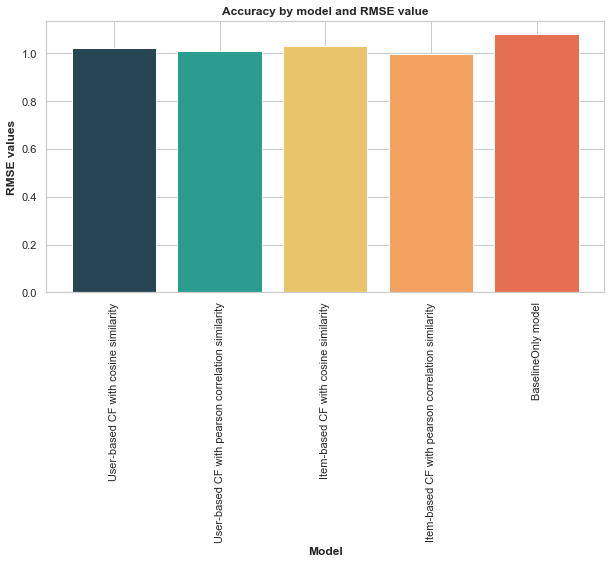

In [137]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,RMSE_values,color=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'] )
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("RMSE values", fontweight='bold')
ax.set_title('Accuracy by model and RMSE value', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Bar graph for models Vs MAE values

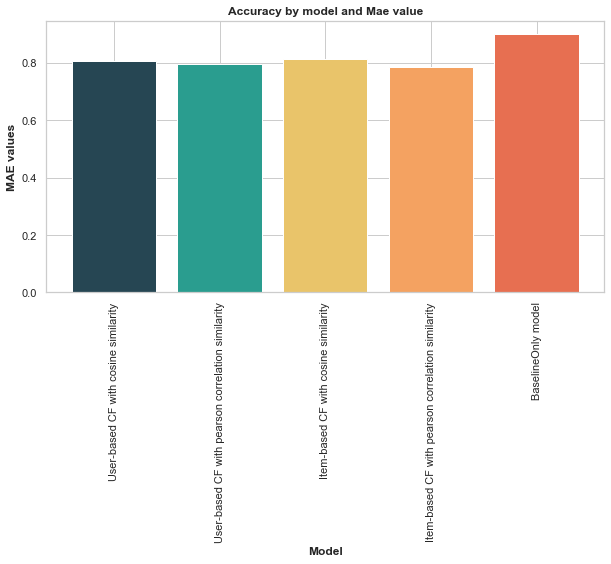

In [136]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,mae_values,color=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'] )
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("MAE values", fontweight='bold')
ax.set_title('Accuracy by model and Mae value', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Bar graph for models Vs Fit-time values

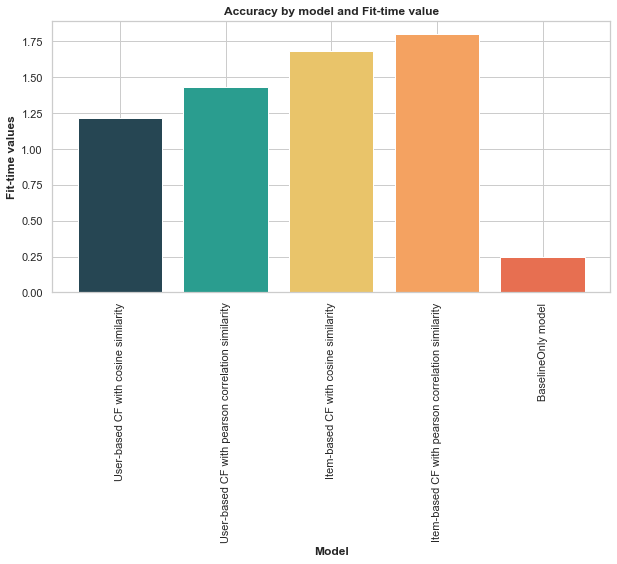

In [135]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,fit_time_values,color=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'] )
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("Fit-time values", fontweight='bold')
ax.set_title('Accuracy by model and Fit-time value', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Bar graph for models Vs RMSE, MAE, Fit-time values

- Disclaimer: Units of RMSE, MAE, Fit-time are different, this is just for visualisation and for quick understanding of models accuracy and performance

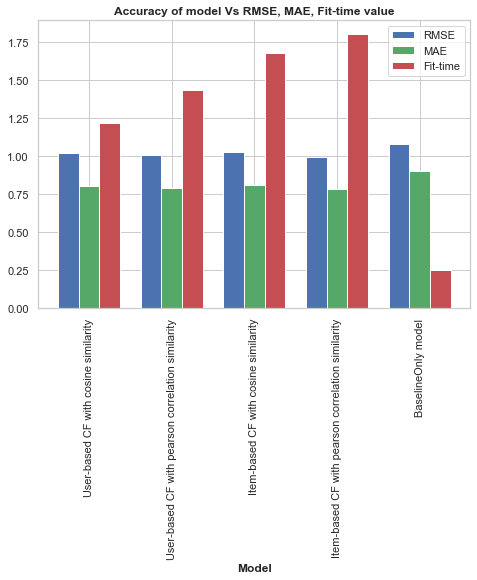

In [152]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(5)
barWidth = 0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, RMSE_values, color = 'b', width = 0.25, label = 'RMSE')
ax.bar(X + 0.25, mae_values, color = 'g', width = 0.25, label = 'MAE')
ax.bar(X + 0.50, fit_time_values, color = 'r', width = 0.25, label = 'Fit-time')
ax.set_title('Accuracy of model Vs RMSE, MAE, Fit-time value', fontweight='bold')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(benchmark_metrics))], benchmark_metrics, rotation=90)
plt.legend()
plt.show()